In [539]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report
from itertools import product

In [540]:
bank_df = pd.read_csv('/Users/risharane/Downloads/Bank Customer Churn Prediction.csv')

In [541]:
bank_df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [542]:
bank_df.drop(columns = ['customer_id'], inplace = True)

## Data Preprocessing

In [543]:
numeric_cols = bank_df.select_dtypes(include = np.number).columns.tolist()
categorical_cols = bank_df.select_dtypes('object').columns.tolist()

In [544]:
bank_df[numeric_cols].isna().sum()

credit_score        0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

The numeric cols has no null value

In [545]:
bank_df[categorical_cols].isna().sum()

country    0
gender     0
dtype: int64

Even the categorical cols has no null value

In [546]:
bank_df.describe().iloc[:,1:]

,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


##  Correlation 

In [547]:
correlation_df = pd.DataFrame(columns=['Column', 'Correlation'])

In [548]:
def correlation(dependent_col):
    cor = bank_df.churn.corr(bank_df[dependent_col])
    correlation_df.loc[len(correlation_df)] = [dependent_col, cor]

In [549]:
correlation('age')
correlation('tenure')
correlation('balance')
correlation('estimated_salary')
correlation('active_member')
correlation('credit_card')
correlation('products_number')
correlation('credit_score')

In [550]:
correlation_df

,Column,Correlation
0,age,0.285323
1,tenure,-0.014001
2,balance,0.118533
3,estimated_salary,0.012097
4,active_member,-0.156128
5,credit_card,-0.007138
6,products_number,-0.047820
7,credit_score,-0.027094


Tenure, active_member, credit_card, products_number and credit_score have inverse correlation

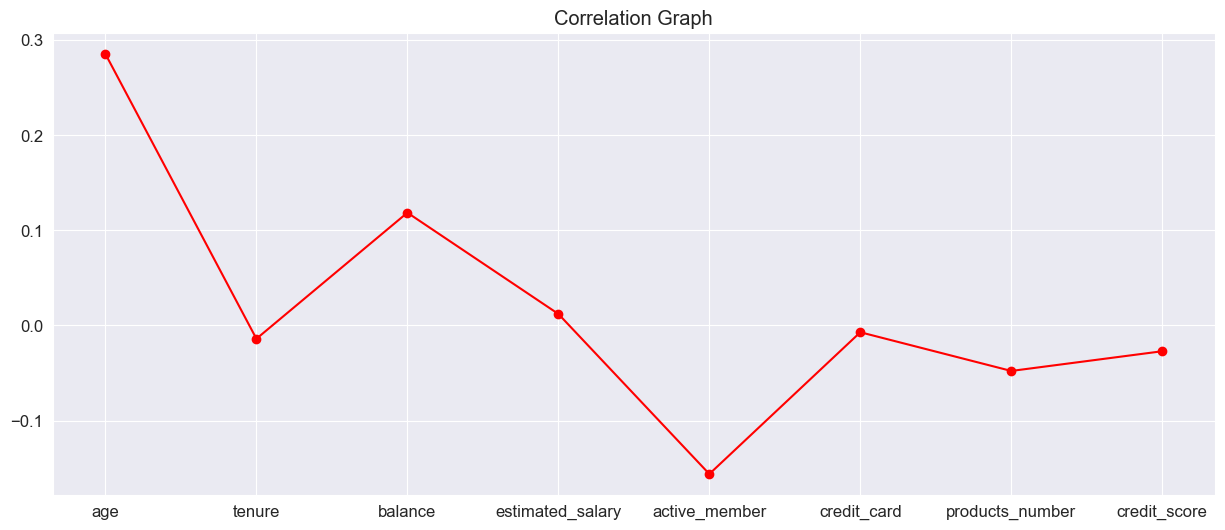

In [580]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
plt.figure(figsize = (15, 6))
plt.title('Correlation Graph');
plt.plot(correlation_df.Column, correlation_df.Correlation, 'o-r');

'Age' has the highest positive correlation<br>
'Active Member' has the highest inverse correlation<br>
'Tenure' has no correlation with the target

## Feature Scaling

In [552]:
bank_df[numeric_cols]

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [553]:
scaler = MinMaxScaler()

In [554]:
scaler.fit(bank_df[numeric_cols])

MinMaxScaler()

In [555]:
bank_df[numeric_cols] = scaler.transform(bank_df[numeric_cols])

## One Hot Encoder

In [556]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [557]:
encoder.fit(bank_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [558]:
encoder.categories_

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [559]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [560]:
encoded_cols

['country_France',
 'country_Germany',
 'country_Spain',
 'gender_Female',
 'gender_Male']

In [561]:
bank_df[encoded_cols] = encoder.transform(bank_df[categorical_cols])

In [562]:
num_cols = numeric_cols[0:-1]
num_cols

['credit_score',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary']

## Train Test Split

In [563]:
X = bank_df[num_cols + encoded_cols]
y = bank_df['churn']

In [564]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Modeling & Hyperparameter Tuning

In [565]:
y_train.value_counts()

churn
0.0    6356
1.0    1644
Name: count, dtype: int64

In [566]:
model = RandomForestClassifier(n_jobs = 1, 
                               random_state=42, 
                               n_estimators = 250, 
                               max_features=6, 
                               max_depth = 15,
                              class_weight={0.0 : 1, 1.0 : 2})

In [567]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0.0: 1, 1.0: 2}, max_depth=15,
                       max_features=6, n_estimators=250, n_jobs=1,
                       random_state=42)

In [568]:
model.score(X_train, y_train) * 100

99.6125

In [569]:
model.score(X_test, y_test) * 100

87.05000000000001

In [570]:
def visualize_tree(tree_no):
    plt.figure(figsize=(80,20))
    plot_tree(model.estimators_[tree_no], max_depth=2, feature_names=X_train.columns, filled = True, rounded=True);

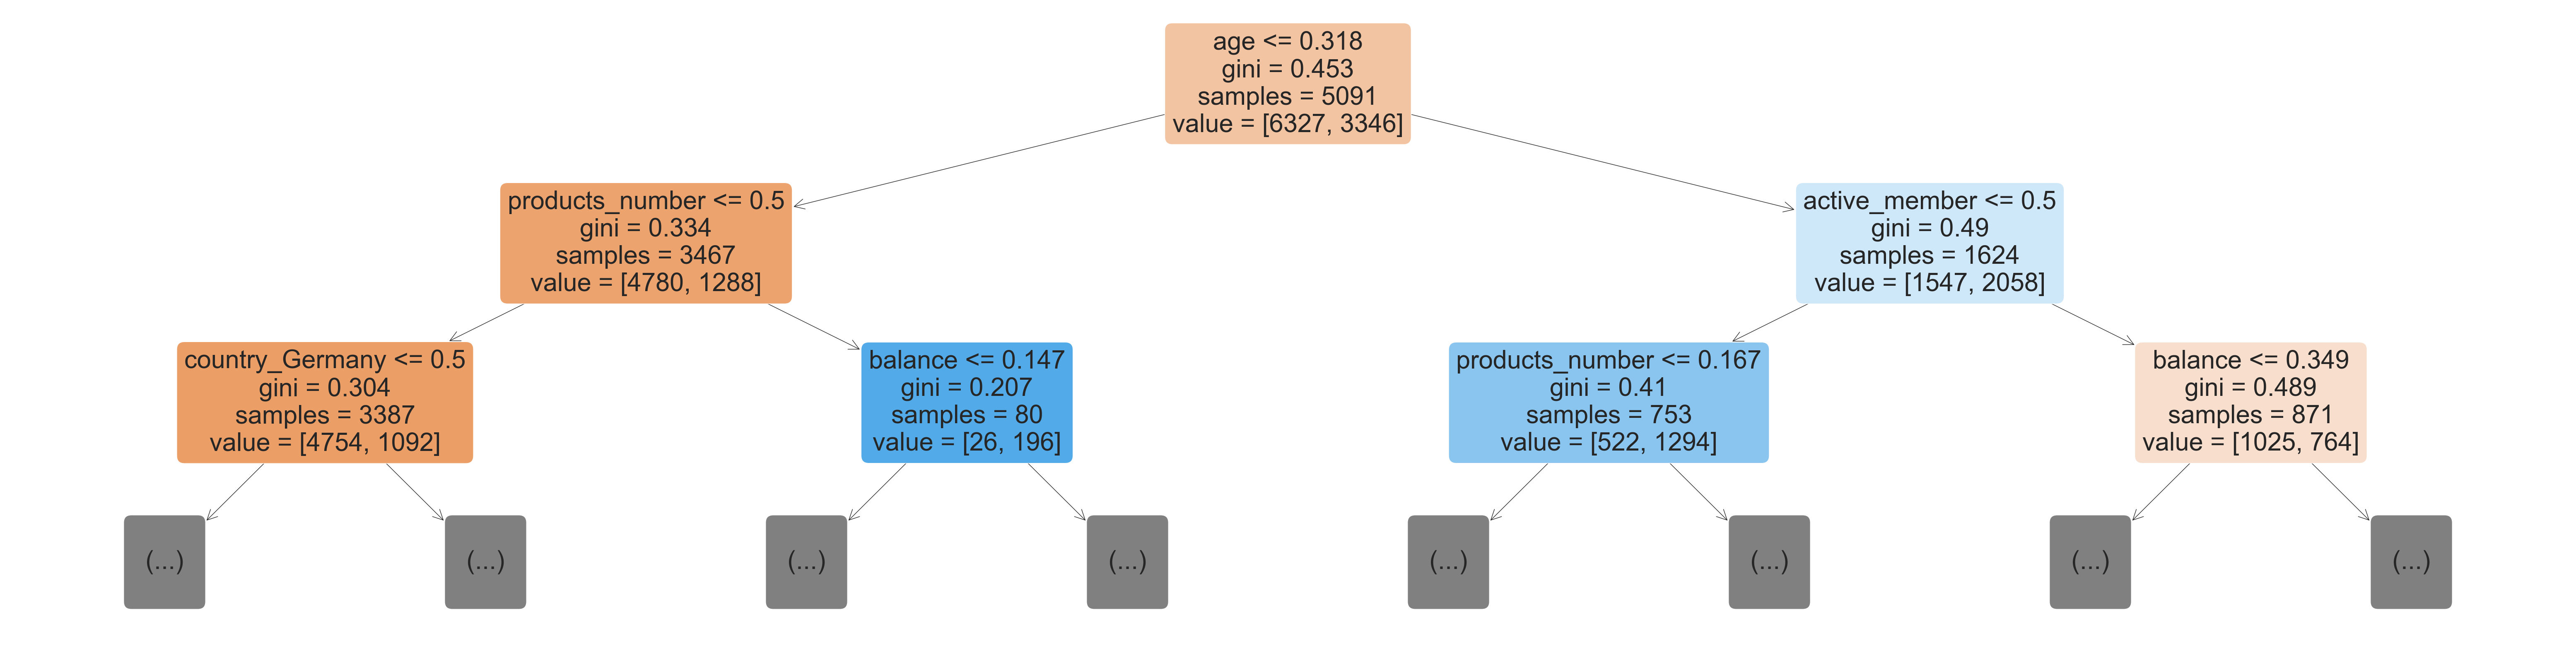

In [571]:
# Visualizing 3rd tree
visualize_tree(3)

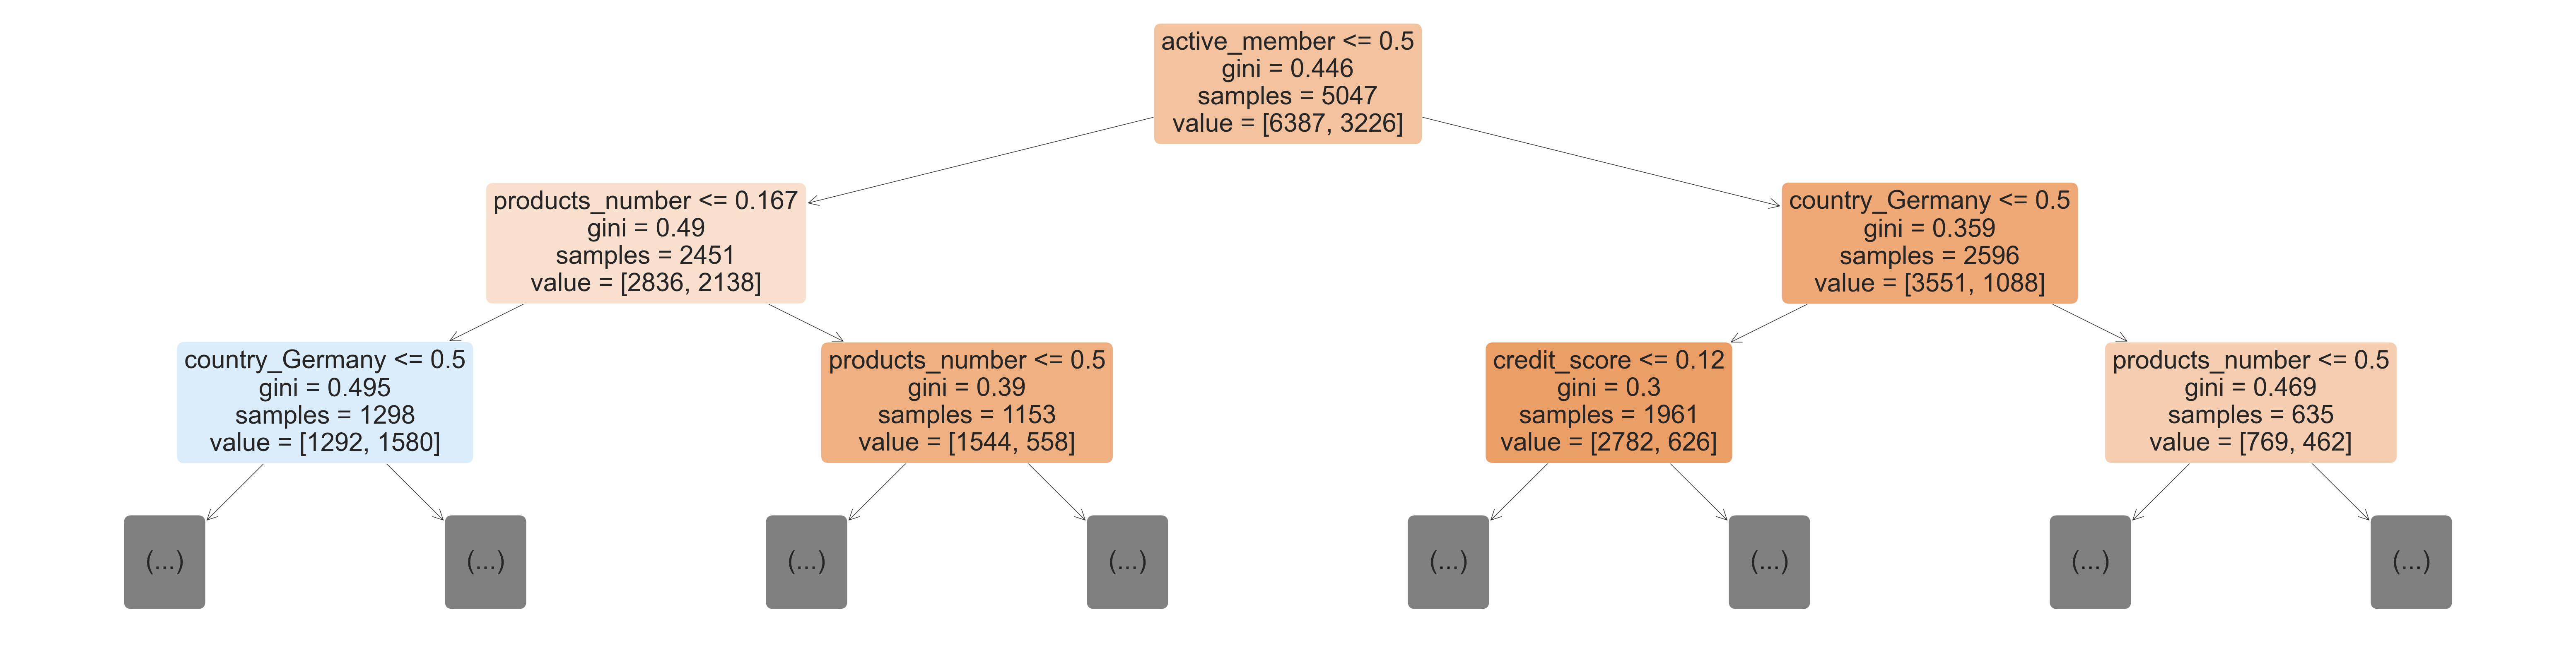

In [572]:
# Visualizing 72nd tree
visualize_tree(72)

In [573]:
cf = confusion_matrix(y_test, model.predict(X_test), normalize = 'true')
cf

array([[0.95830741, 0.04169259],
       [0.48854962, 0.51145038]])

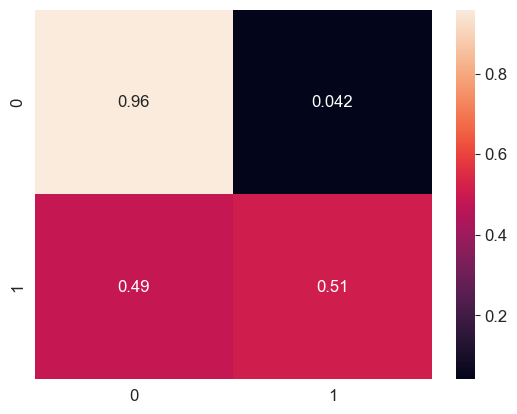

In [574]:
sns.heatmap(cf, annot = True);

In [577]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92      1607
         1.0       0.75      0.51      0.61       393

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.77      2000
weighted avg       0.86      0.87      0.86      2000

